## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [132]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, roc_curve, auc, classification_report, roc_auc_score, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import six
import sys
sys.modules['sklearn.externals.six'] = six
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from sklearn.utils import _safe_indexing
sys.modules['sklearn.utils.safe_indexing'] = sklearn.utils._safe_indexing
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn import decomposition

In [133]:
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

In [134]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [136]:
df.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [137]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [138]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [139]:
df['account length'].value_counts()

105    43
87     42
93     40
101    40
90     39
       ..
191     1
199     1
215     1
221     1
2       1
Name: account length, Length: 212, dtype: int64

In [140]:
df['number vmail messages'].value_counts()

0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
25      37
23      36
36      34
35      32
22      32
39      30
37      29
34      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
41      13
16      13
43       9
15       9
18       7
44       7
14       7
45       6
12       6
46       4
13       4
47       3
8        2
48       2
50       2
9        2
11       2
49       1
10       1
4        1
51       1
Name: number vmail messages, dtype: int64

In [141]:
df['customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer service calls, dtype: int64

In [142]:
df.drop(columns=['phone number'], inplace=True)

In [143]:
df.replace(False, 0, inplace=True)
df.replace(True, 1, inplace=True)
df.replace('no', 0, inplace=True)
df.replace('yes', 1, inplace=True)

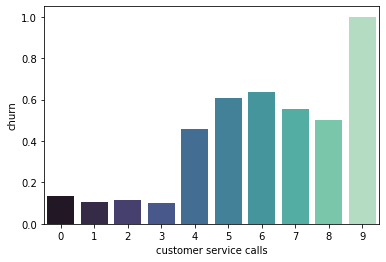

In [144]:
sns.barplot(x='customer service calls', y='churn',
                    data=df, palette='mako', ci=None)

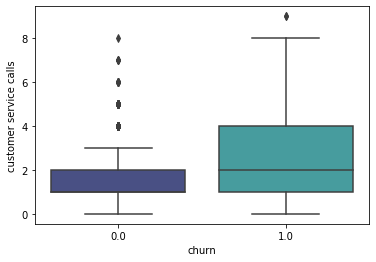

In [145]:
sns.boxplot(x='churn', y='customer service calls',
              data=df, palette='mako')

In [146]:
churn_rate = sum(df['churn']) / len(df['churn'])
churn_rate

0.14491449144914492

In [147]:
df['total_minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes']
df['total_calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls']

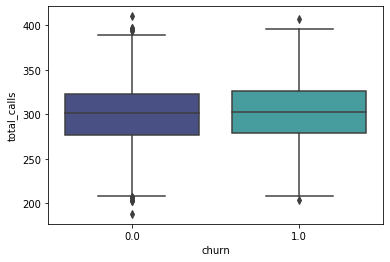

In [148]:
sns.boxplot(x='churn', y='total_calls',
              data=df, palette='mako')

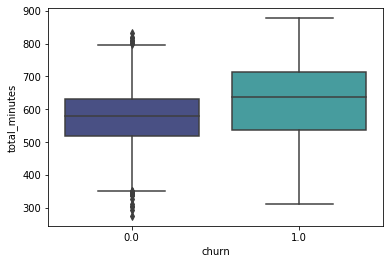

In [149]:
sns.boxplot(x='churn', y='total_minutes',
              data=df, palette='mako')

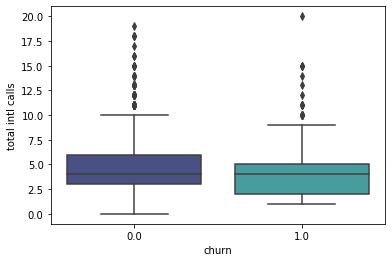

In [150]:
sns.boxplot(x='churn', y='total intl calls',
              data=df, palette='mako')

In [151]:
charges = ['total day charge', 'total eve charge', 'total night charge', 'total intl charge']
calls = ['total day calls', 'total eve calls', 'total night calls', 'total intl calls']
for charge, call in zip(charges, calls):
    print((df[charge] / df[call]).median())

0.3044545454545455
0.1687546152710087
0.0902803738317757
0.6639999999999999


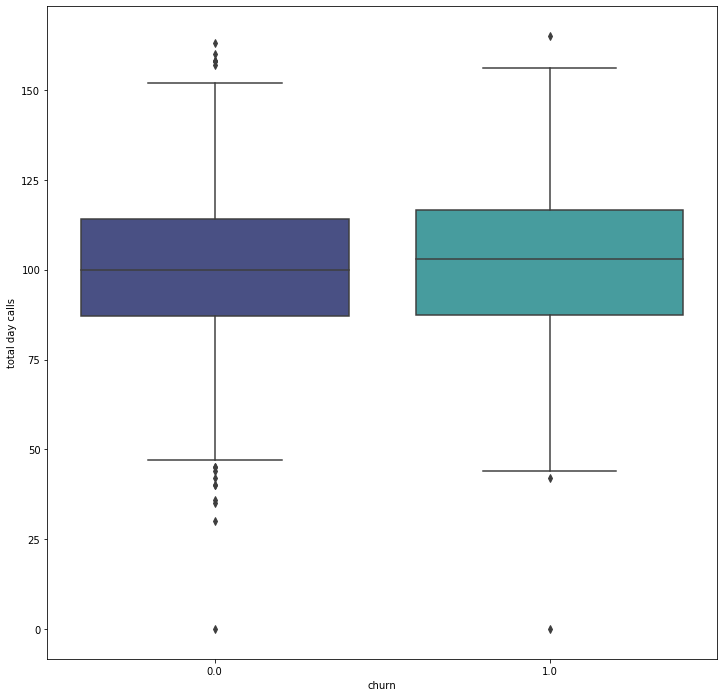

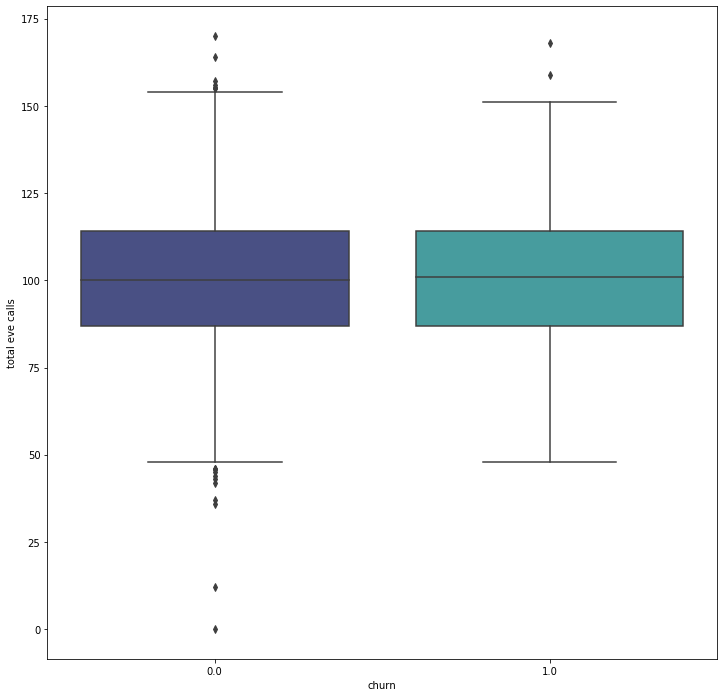

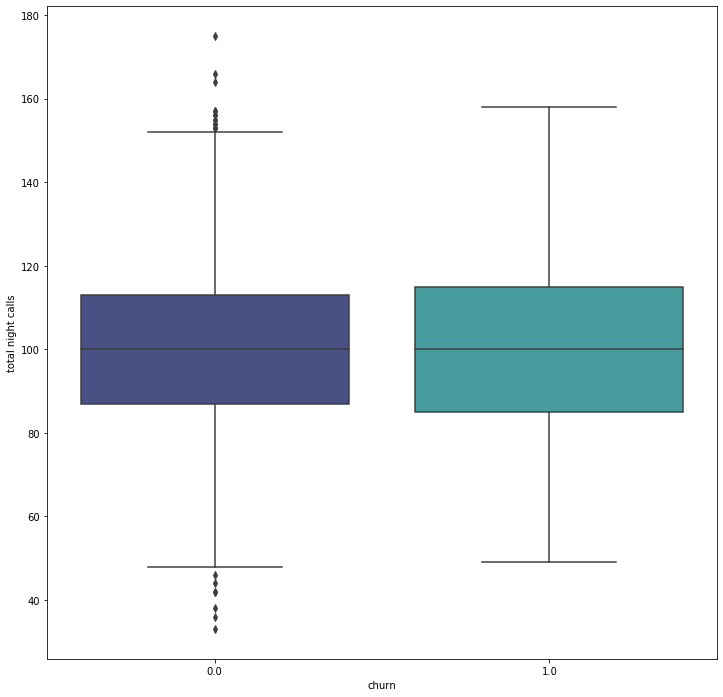

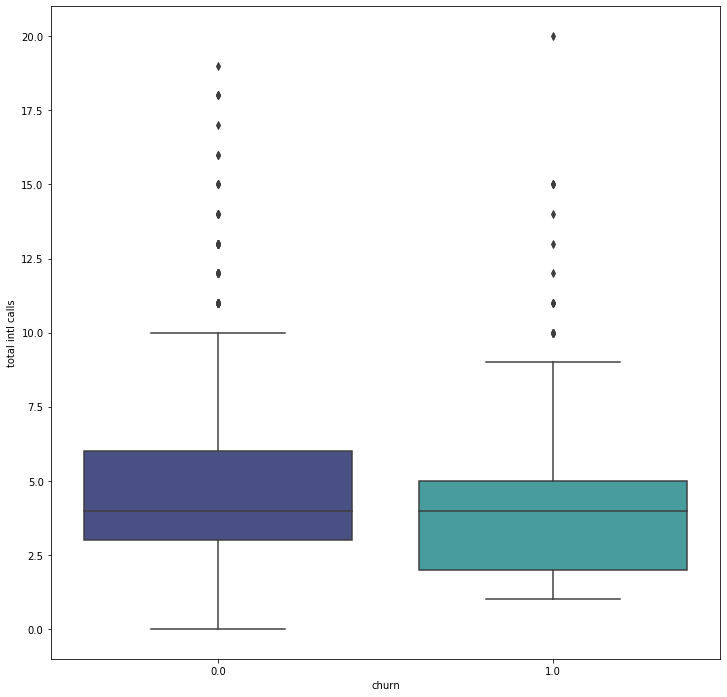

In [152]:
for call in calls:
    plt.figure(figsize=(12,12))
    sns.boxplot(x='churn', y=call,
              data=df, palette='mako')

In [153]:
state_churn = df.groupby('state')['churn'].value_counts(normalize=True)
state_churn = pd.DataFrame(state_churn)
state_churn.columns = ['amount']
state_churn = state_churn.reset_index()

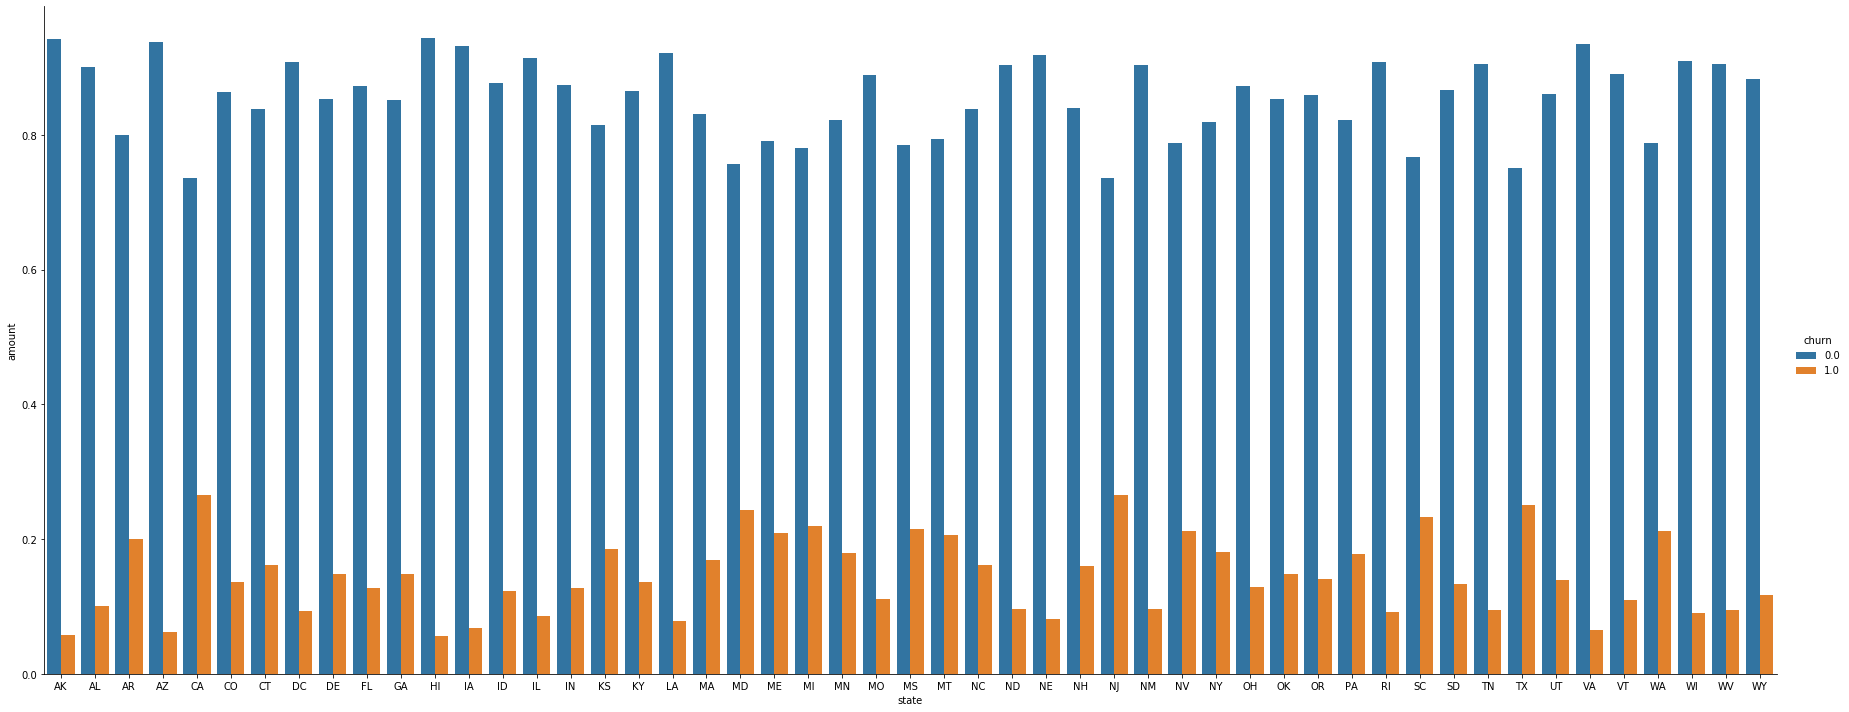

In [154]:
sns.catplot(data=state_churn, kind='bar', x='state', y='amount', hue='churn', aspect=2.5, height=10)

In [155]:
new_df = df.drop(columns=['state', 'area code'], axis=1)

### Baseline Model 

In [156]:
X = new_df.drop(columns=['churn'], axis=1)
y = new_df.churn

In [157]:
scaler = RobustScaler()

In [158]:
RF = RandomForestClassifier()

In [159]:
pipeline = make_pipeline(scaler, RF)

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,  random_state=42 )

In [161]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [162]:
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

In [163]:
train_score = roc_auc_score(y_train, train_pred)
test_score = roc_auc_score(y_test, test_pred)

In [164]:
train_score

1.0

In [165]:
test_score

0.8912947813822285

In [166]:
#Model is overfit, let's use GridSearch 

In [167]:
grid_param = {'n_estimators': [50,100], 
              'class_weight': ['balanced'], 
              'criterion': ['gini', 'entropy'], 
              'max_depth': [2,4,6], 
              'min_samples_split': [2, 5, 10], 
              'min_samples_leaf': [1, 3, 5]
              } 

In [168]:
grid_search = GridSearchCV(RF, grid_param, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6], 'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100]},
             scoring='roc_auc')

In [169]:
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 50}

In [170]:
RF_best = grid_search.best_estimator_

In [171]:
RF_best.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=50)

In [172]:
train_pred2 = RF_best.predict(X_train)
test_pred2 = RF_best.predict(X_test)

In [173]:
train_score2 = roc_auc_score(y_train, train_pred2)

In [174]:
test_score2 = roc_auc_score(y_test, test_pred2)

In [175]:
train_score2

0.9201346940160057

In [176]:
test_score2

0.9014217207334273

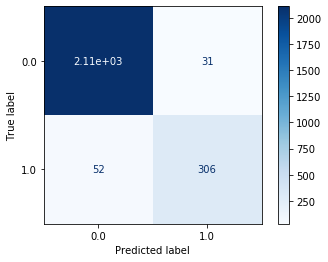

In [177]:
plot_confusion_matrix(RF_best, X_train, y_train, cmap=plt.cm.Blues, values_format='.3g')

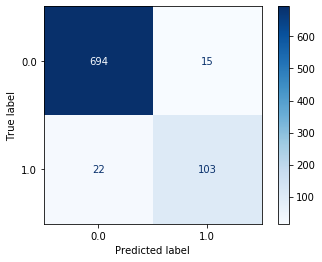

In [178]:
plot_confusion_matrix(RF_best, X_test, y_test, cmap=plt.cm.Blues, values_format='.3g')

In [179]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

In [180]:
print_metrics(y_train, train_pred2)

Precision Score: 0.9080118694362018
Recall Score: 0.8547486033519553
Accuracy Score: 0.9667867146858744
F1 Score: 0.8805755395683453


### Logistic Regression

In [181]:
pca = decomposition.PCA()

In [182]:
logreg = LogisticRegression(fit_intercept=False, solver='liblinear')

In [183]:
pipeline = Pipeline(steps=[('pca', pca), ('logreg', logreg)])

In [184]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA()),
                ('logreg',
                 LogisticRegression(fit_intercept=False, solver='liblinear'))])

In [185]:
train_preds = pipeline.predict(X_train)
test_preds = pipeline.predict(X_test)

In [186]:
train_score_3 = roc_auc_score(y_train, train_preds)
test_score_3 = roc_auc_score(y_test, test_preds)

In [187]:
train_score_3

0.7461688398101447

In [188]:
test_score_3

0.7608744710860367

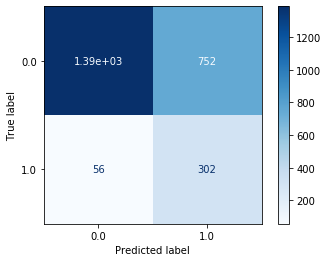

In [189]:
plot_confusion_matrix(pipeline, X_train, y_train, cmap=plt.cm.Blues, values_format='.3g')

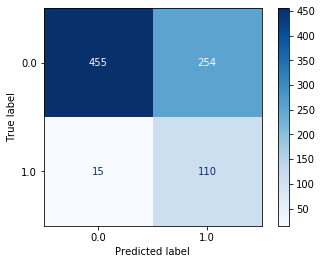

In [190]:
plot_confusion_matrix(pipeline, X_test, y_test, cmap=plt.cm.Blues, values_format='.3g')

In [191]:
#It doesn't seem like Logistic Regression will be the way to go.

### Gradient Boosting and AdaBoost

In [192]:
gbt_clf = GradientBoostingClassifier(random_state=42)
adaboost_clf = AdaBoostClassifier(random_state=42)

In [193]:
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [194]:
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [195]:
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [196]:
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

In [197]:
print_metrics(y_train, gbt_clf_train_preds)

Precision Score: 0.9967213114754099
Recall Score: 0.8491620111731844
Accuracy Score: 0.9779911964785915
F1 Score: 0.9170437405731523


In [198]:
print_metrics(y_train, adaboost_train_preds)

Precision Score: 0.7531380753138075
Recall Score: 0.5027932960893855
Accuracy Score: 0.9051620648259304
F1 Score: 0.6030150753768845


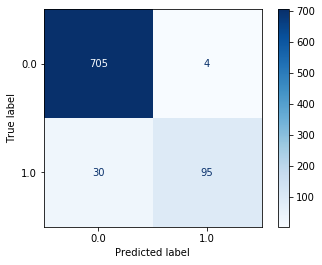

In [199]:
plot_confusion_matrix(gbt_clf, X_test, y_test, cmap=plt.cm.Blues, values_format='.3g')

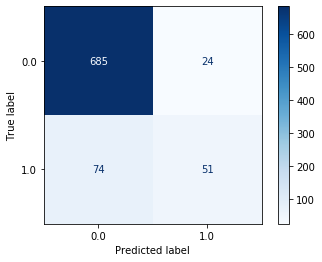

In [200]:
plot_confusion_matrix(adaboost_clf, X_test, y_test, cmap=plt.cm.Blues, values_format='.3g')

### K-Nearest Neighbors

In [201]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [202]:
knn_clf_train_preds = knn_clf.predict(X_train)
knn_clf_test_preds = knn_clf.predict(X_test)

In [203]:
print_metrics(y_train, knn_clf_train_preds)

Precision Score: 0.8291139240506329
Recall Score: 0.3659217877094972
Accuracy Score: 0.898359343737495
F1 Score: 0.5077519379844961


In [204]:
print_metrics(y_test, knn_clf_test_preds)

Precision Score: 0.6896551724137931
Recall Score: 0.32
Accuracy Score: 0.8764988009592326
F1 Score: 0.4371584699453552


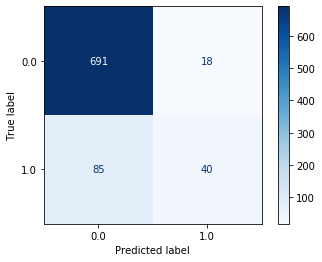

In [205]:
plot_confusion_matrix(knn_clf, X_test, y_test, cmap=plt.cm.Blues, values_format='.3g')

In [206]:
#Recall not great, possibly could be tuned but not looking like KNN is the way to go.

In [207]:
def display_acc_and_roc_auc_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    roc_auc = roc_auc_score(true, preds)
    recall = recall_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("ROC AUC Score: {}".format(roc_auc))
    print("Recall: {}".format(recall))
    
print("Training Metrics")
display_acc_and_roc_auc_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_roc_auc_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
display_acc_and_roc_auc_score(y_train, train_pred2, model_name='Random Forest Classifier')
print("")
print("Testing Metrics")
display_acc_and_roc_auc_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_roc_auc_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')
print("")
display_acc_and_roc_auc_score(y_test, test_pred2, model_name='Random Forest Classifier')

Training Metrics
Model: AdaBoost
Accuracy: 0.9051620648259304
ROC AUC Score: 0.7376180399176492
Recall: 0.5027932960893855

Model: Gradient Boosted Trees
Accuracy: 0.9779911964785915
ROC AUC Score: 0.9243474698556252
Recall: 0.8491620111731844

Model: Random Forest Classifier
Accuracy: 0.9667867146858744
ROC AUC Score: 0.9201346940160057
Recall: 0.8547486033519553

Testing Metrics
Model: AdaBoost
Accuracy: 0.882494004796163
ROC AUC Score: 0.6870747531734839
Recall: 0.408

Model: Gradient Boosted Trees
Accuracy: 0.9592326139088729
ROC AUC Score: 0.877179125528914
Recall: 0.76

Model: Random Forest Classifier
Accuracy: 0.9556354916067147
ROC AUC Score: 0.9014217207334273
Recall: 0.824


In [208]:
#Gradient Boosting better than AdaBoost, but Random Forest Classifier still the best.

## Bringing Back Area Code/State and One Hot Encoding

In [209]:
one_hot_df = pd.get_dummies(data=df, columns=['state', 'area code'], drop_first=True)

In [210]:
one_hot_df.columns

Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn', 'total_minutes',
       'total_calls', 'state_AL', 'state_AR', 'state_AZ', 'state_CA',
       'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA',
       'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS',
       'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI',
       'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC', 'state_ND',
       'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY',
       'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC',
       'state_SD', 'state_TN'

In [211]:
one_hot_df

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,1,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,0,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,77,26.55,215.5,126,18.32,...,0,0,0,0,0,0,0,0,1,0
3329,68,0,0,0,231.1,57,39.29,153.4,55,13.04,...,0,0,0,0,0,0,1,0,1,0
3330,28,0,0,0,180.8,109,30.74,288.8,58,24.55,...,0,0,0,0,0,0,0,0,0,1
3331,184,1,0,0,213.8,105,36.35,159.6,84,13.57,...,0,0,0,0,0,0,0,0,0,1


In [212]:
X = one_hot_df.drop(columns=['churn'], axis=1)
y = one_hot_df.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,  random_state=42 )

### Random Forest Baseline (One Hot)

In [213]:
scaler = RobustScaler()
RF = RandomForestClassifier()
grid_param = {'n_estimators': [50,100], 
              'class_weight': ['balanced'], 
              'criterion': ['gini', 'entropy'], 
              'max_depth': [2,4,6], 
              'min_samples_split': [2, 5, 10], 
              'min_samples_leaf': [1, 3, 5]
              } 
grid_search = GridSearchCV(RF, grid_param, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6], 'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100]},
             scoring='roc_auc')

In [214]:
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [215]:
RF_best = grid_search.best_estimator_
RF_best.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, n_estimators=50)

In [216]:
train_pred2 = RF_best.predict(X_train)
test_pred2 = RF_best.predict(X_test)

In [217]:
train_score2 = roc_auc_score(y_train, train_pred2)
test_score2 = roc_auc_score(y_test, test_pred2)

In [218]:
train_score2

0.9122173108686745

In [219]:
test_score2

0.8618956276445698

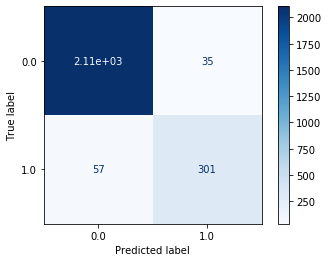

In [220]:
plot_confusion_matrix(RF_best, X_train, y_train, cmap=plt.cm.Blues, values_format='.3g')

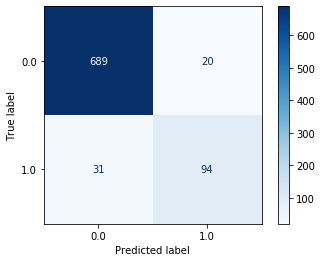

In [221]:
plot_confusion_matrix(RF_best, X_test, y_test, cmap=plt.cm.Blues, values_format='.3g')

In [222]:
print_metrics(y_train, train_pred2)

Precision Score: 0.8958333333333334
Recall Score: 0.840782122905028
Accuracy Score: 0.9631852741096438
F1 Score: 0.8674351585014409


### Gradient Boosting (One Hot)

In [223]:
gbt_clf = GradientBoostingClassifier(random_state=42)
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [224]:
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [225]:
print_metrics(y_train, gbt_clf_train_preds)

Precision Score: 0.993421052631579
Recall Score: 0.8435754189944135
Accuracy Score: 0.9767907162865146
F1 Score: 0.9123867069486405


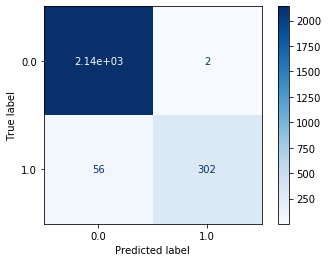

In [226]:
plot_confusion_matrix(gbt_clf, X_train, y_train, cmap=plt.cm.Blues, values_format='.3g')

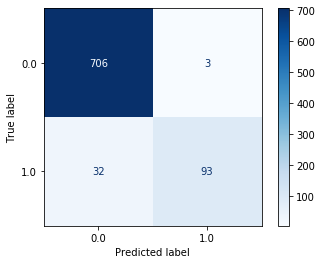

In [227]:
plot_confusion_matrix(gbt_clf, X_test, y_test, cmap=plt.cm.Blues, values_format='.3g')

### Gradient Boosting with SMOTE and Pipeline

In [228]:
X = new_df.drop(columns=['churn'], axis=1)
y = new_df.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,  random_state=42 )
smote = SMOTE()
gbt_clf = GradientBoostingClassifier()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)
gbt_clf.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier()

In [230]:
pipeline = make_pipeline(smote, gbt_clf)

In [232]:
pipeline.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('smote', SMOTE()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [233]:
pipeline.score(X_test, y_test)

0.9556354916067147

In [234]:
pipeline_train_preds = pipeline.predict(X_train_resampled)
pipeline_test_preds = pipeline.predict(X_test)

In [236]:
print_metrics(y_train_resampled, pipeline_train_preds)

Precision Score: 0.9841193455245428
Recall Score: 0.9551611396543671
Accuracy Score: 0.9698738907052779
F1 Score: 0.9694240341313107


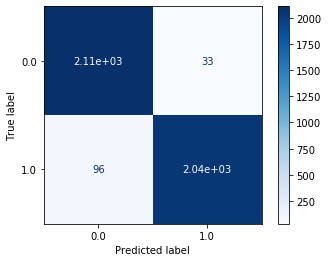

In [237]:
plot_confusion_matrix(pipeline, X_train_resampled, y_train_resampled, cmap=plt.cm.Blues, values_format='.3g')

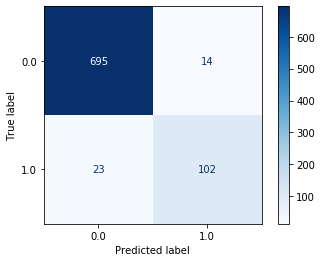

In [238]:
plot_confusion_matrix(pipeline, X_test, y_test, cmap=plt.cm.Blues, values_format='.3g')

## Logistic Regression

In [31]:
X = one_hot_df.drop(columns=['churn'])
y = one_hot_df.churn

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [33]:
logreg = LogisticRegression(fit_intercept=False, solver='liblinear')
model_log = logreg.fit(X_train, y_train)

In [34]:
y_hat_test = logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_hat_test)
cnf_matrix

array([[549,  17],
       [ 88,  13]])

In [35]:
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [36]:
print(precision_score(y_train, y_hat_train))
print(precision_score(y_test, y_hat_test))
print(recall_score(y_train, y_hat_train))
print(recall_score(y_test, y_hat_test))
print(accuracy_score(y_train, y_hat_train))
print(accuracy_score(y_test, y_hat_test))
print(f1_score(y_train, y_hat_train))
print(f1_score(y_test, y_hat_test))

0.6328125
0.43333333333333335
0.21204188481675393
0.12871287128712872
0.8694673668417104
0.8425787106446777
0.31764705882352945
0.1984732824427481


In [37]:
training_precision = []
testing_precision = []
training_recall = []
testing_recall = []
training_accuracy = []
testing_accuracy = []
training_f1 = []
testing_f1 = []

for i in range(10, 95):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100) # replace the "None" here
    logreg = LogisticRegression(fit_intercept=False, C=1e20, solver='liblinear')
    model_log = logreg.fit(X_train, y_train)
    y_hat_test = logreg.predict(X_test)
    y_hat_train = logreg.predict(X_train) 
    training_precision.append(precision_score(y_train, y_hat_train))
    testing_precision.append(precision_score(y_test, y_hat_test))
    training_recall.append(recall_score(y_train, y_hat_train))
    testing_recall.append(recall_score(y_test, y_hat_test))
    training_accuracy.append(accuracy_score(y_train, y_hat_train))
    testing_accuracy.append(accuracy_score(y_test, y_hat_test))
    training_f1.append(f1_score(y_train, y_hat_train))
    testing_f1.append(f1_score(y_test, y_hat_test))

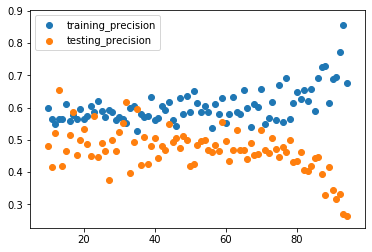

In [38]:
plt.scatter(list(range(10, 95)), training_precision, label='training_precision')
plt.scatter(list(range(10, 95)), testing_precision, label='testing_precision')
plt.legend()
plt.show()

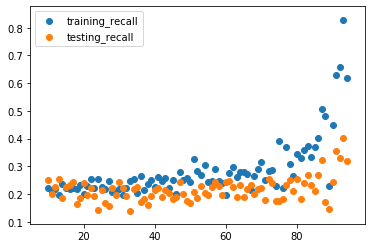

In [39]:
plt.scatter(list(range(10, 95)), training_recall, label='training_recall')
plt.scatter(list(range(10, 95)), testing_recall, label='testing_recall')
plt.legend()
plt.show()

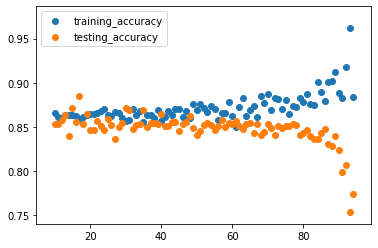

In [40]:
plt.scatter(list(range(10, 95)), training_accuracy, label='training_accuracy')
plt.scatter(list(range(10, 95)), testing_accuracy, label='testing_accuracy')
plt.legend()
plt.show()

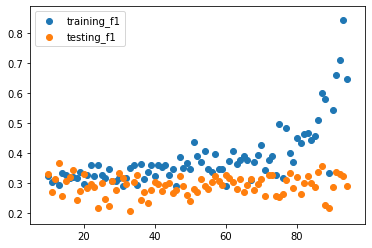

In [41]:
plt.scatter(list(range(10, 95)), training_f1, label='training_f1')
plt.scatter(list(range(10, 95)), testing_f1, label='testing_f1')
plt.legend()
plt.show()

In [42]:
# Calculate the probability scores of each point in the training set
y_train_score = model_log.decision_function(X_train)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

# Calculate the probability scores of each point in the test set
y_test_score = model_log.decision_function(X_test)

# Calculate the fpr, tpr, and thresholds for the test set
test_fpr, test_tpr, thresholds = roc_curve(y_test, y_test_score)

AUC: 0.9397504456327985


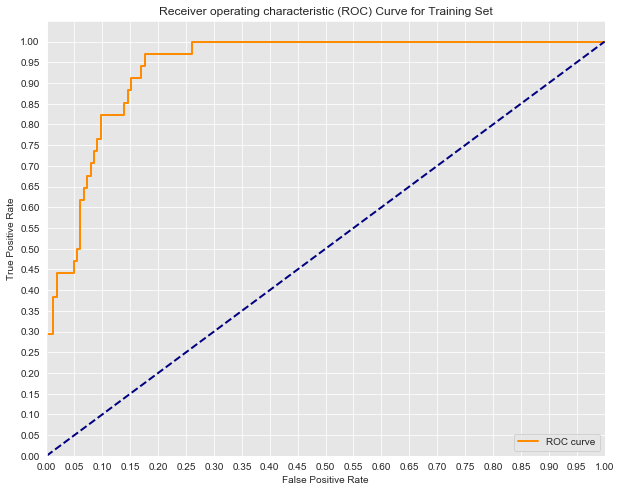

In [43]:
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# ROC curve for training set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(train_fpr, train_tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('AUC: {}'.format(auc(train_fpr, train_tpr)))
plt.show()

AUC: 0.629658292999548


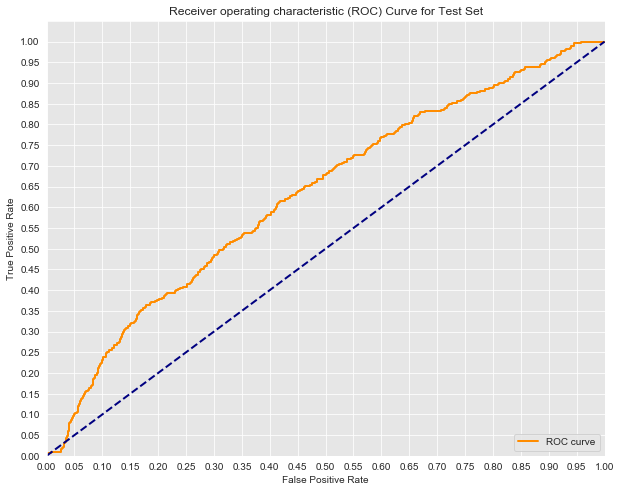

In [44]:
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc='lower right')
print('AUC: {}'.format(auc(test_fpr, test_tpr)))
plt.show()

## K-Nearest Neighbors

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [46]:
scaler = StandardScaler()

In [47]:
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

In [48]:
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X.columns)
scaled_df_train.head()

,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,3.601382,-0.326624,-0.611162,-0.584936,-0.429657,-1.547170,-1.840891,-0.731087,0.925634,1.256197,...,-0.141042,-0.129542,-0.150437,6.705633,-0.154303,-0.145137,-0.147809,-0.161784,-0.180369,-0.153025
1,0.184951,-0.326624,-0.611162,-0.584936,0.224176,-1.244071,0.499864,-0.139179,-0.353704,0.164841,...,-0.141042,-0.129542,-0.150437,-0.149128,-0.154303,-0.145137,-0.147809,-0.161784,-0.180369,-0.153025
2,-0.650176,3.061624,-0.611162,-0.584936,-1.133785,0.787772,0.549667,2.493068,0.209205,0.147309,...,-0.141042,-0.129542,6.647288,-0.149128,-0.154303,-0.145137,-0.147809,-0.161784,-0.180369,-0.153025
3,1.020079,-0.326624,-0.611162,-0.584936,-0.127888,-0.970200,-1.890695,-0.408439,1.437368,-1.176344,...,-0.141042,-0.129542,-0.150437,-0.149128,-0.154303,-0.145137,-0.147809,-0.161784,-0.180369,-0.153025
4,-0.371801,-0.326624,-0.611162,-0.584936,-0.228477,0.675192,-1.143645,1.295326,0.516246,0.265649,...,-0.141042,-0.129542,-0.150437,-0.149128,-0.154303,-0.145137,-0.147809,-0.161784,-0.180369,-0.153025


In [49]:
clf = KNeighborsClassifier()
clf.fit(scaled_data_train, y_train)
test_preds = clf.predict(scaled_data_test)

In [50]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.36363636363636365
Recall Score: 0.039603960396039604
Accuracy Score: 0.8440779610194903
F1 Score: 0.07142857142857144


In [51]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        recall = recall_score(y_test, preds)
        if recall > best_score:
            best_k = k
            best_score = recall
    
    print("Best Value for k: {}".format(best_k))
    print("Recall: {}".format(best_score))

In [52]:
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)

Best Value for k: 1
Recall: 0.19801980198019803


In [53]:
#Without scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [54]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
test_preds = clf.predict(X_test)

In [55]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.8
Recall Score: 0.1188118811881188
Accuracy Score: 0.8620689655172413
F1 Score: 0.20689655172413793


In [56]:
find_best_k(X_train, y_train, X_test, y_test)

Best Value for k: 1
Recall: 0.22772277227722773


In [57]:
#In anticipation of Decision tree, using DecisionTreeClassifier
SEED = 1
dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [58]:
y_pred = dt.predict(X_test)

In [59]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.849202323059161

In [60]:
recall_score(y_test, y_pred)

0.7425742574257426

## Let's try again using SMOTE


In [61]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)

In [62]:
logreg = LogisticRegression(fit_intercept=False, solver='liblinear')
model_log = logreg.fit(X_train_resampled, y_train_resampled)

In [63]:
y_hat_test = logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_hat_test)
cnf_matrix

array([[431, 135],
       [ 35,  66]])

In [64]:
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [65]:
print(precision_score(y_train, y_hat_train))
print(precision_score(y_test, y_hat_test))
print(recall_score(y_train, y_hat_train))
print(recall_score(y_test, y_hat_test))
print(accuracy_score(y_train, y_hat_train))
print(accuracy_score(y_test, y_hat_test))
print(f1_score(y_train, y_hat_train))
print(f1_score(y_test, y_hat_test))

0.33900364520048604
0.3283582089552239
0.7303664921465969
0.6534653465346535
0.7573143285821455
0.7451274362818591
0.46307053941908716
0.43708609271523186


In [66]:
#KNN without scaling
clf = KNeighborsClassifier()
clf.fit(X_train_resampled, y_train_resampled)
test_preds = clf.predict(X_test)

In [67]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.20588235294117646
Recall Score: 0.48514851485148514
Accuracy Score: 0.638680659670165
F1 Score: 0.2890855457227139


In [68]:
find_best_k(X_train_resampled, y_train_resampled, X_test, y_test)

Best Value for k: 17
Recall: 0.5247524752475248


In [69]:
#In anticipation of Decision tree, using DecisionTreeClassifier
SEED = 1
dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED)
dt.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [70]:
y_pred = dt.predict(X_test)

In [71]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8523860336563691

In [72]:
recall_score(y_test, y_pred)
#Better!

0.7524752475247525

## Decision Tree Tuning

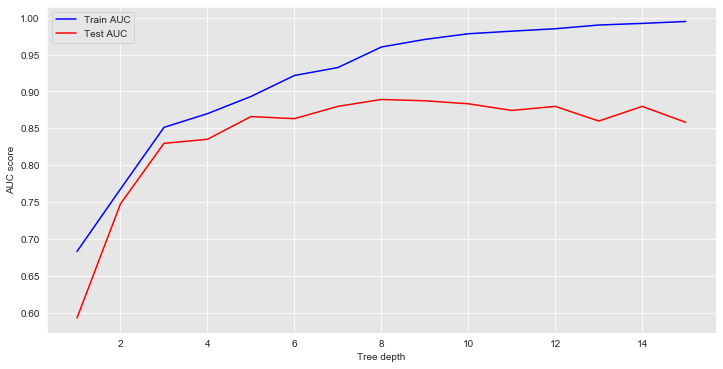

In [73]:
# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 15, 15, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=SEED)
   dt.fit(X_train_resampled, y_train_resampled)
   train_pred = dt.predict(X_train_resampled)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

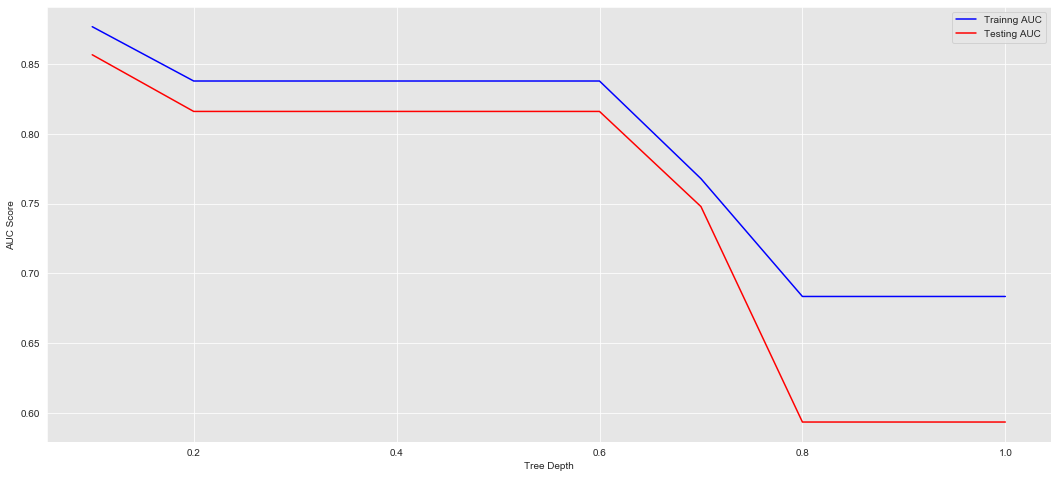

In [74]:
# Identify the optimal min-samples-split for given data
min_samples_splits = np.linspace(0.1, 1, 10)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split, random_state=SEED)
    dt.fit(X_train_resampled, y_train_resampled)
    train_pred = dt.predict(X_train_resampled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(18,8))
plt.plot(min_samples_splits, train_results, color='blue', label='Trainng AUC')
plt.plot(min_samples_splits, test_results, color='red', label='Testing AUC')
plt.xlabel('Tree Depth')
plt.ylabel('AUC Score')
plt.legend()
plt.show()

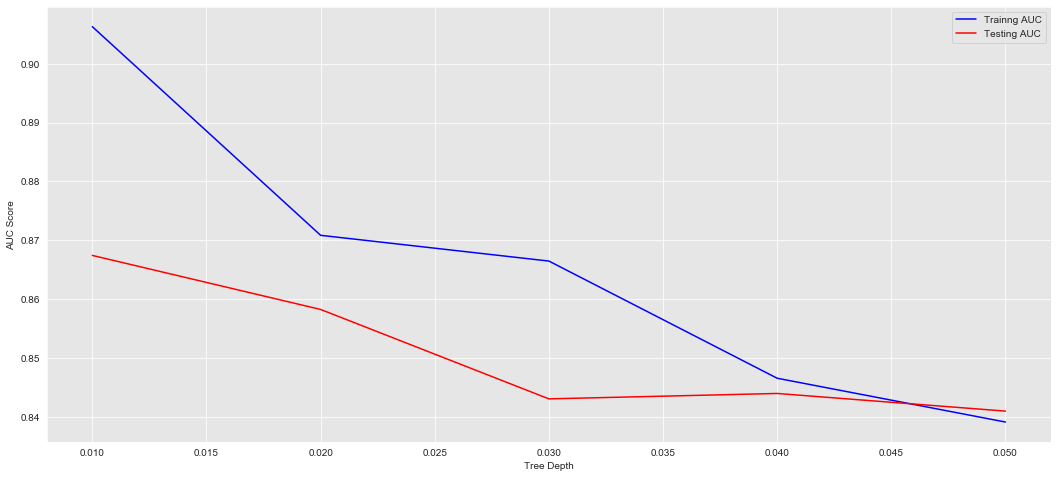

In [75]:
# Calculate the optimal value for minimum sample leafs
min_samples_leafs = np.linspace(0.01, 0.05, 5)
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, random_state=SEED)
    dt.fit(X_train_resampled, y_train_resampled)
    train_pred = dt.predict(X_train_resampled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(18,8))
plt.plot(min_samples_leafs, train_results, color='blue', label='Trainng AUC')
plt.plot(min_samples_leafs, test_results, color='red', label='Testing AUC')
plt.xlabel('Tree Depth')
plt.ylabel('AUC Score')
plt.legend()
plt.show()

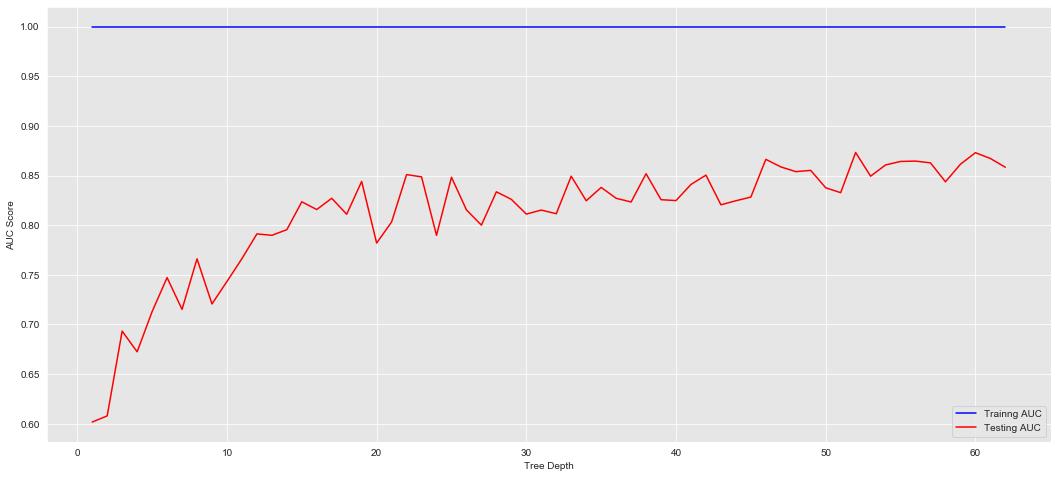

In [76]:
# Find the best value for optimal maximum feature size
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []

for max_feature in max_features:
    dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature, random_state=SEED)
    dt.fit(X_train_resampled, y_train_resampled)
    train_pred = dt.predict(X_train_resampled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(18,8))
plt.plot(max_features, train_results, color='blue', label='Trainng AUC')
plt.plot(max_features, test_results, color='red', label='Testing AUC')
plt.xlabel('Tree Depth')
plt.ylabel('AUC Score')
plt.legend()
plt.show()

In [77]:
dt = DecisionTreeClassifier(criterion='entropy',
                           max_features=32,
                           max_depth=5,
                           min_samples_split=0.2,
                           min_samples_leaf=0.047, 
                           random_state=SEED)
dt.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=32,
                       min_samples_leaf=0.047, min_samples_split=0.2,
                       random_state=1)

In [78]:
y_pred = dt.predict(X_test)

In [79]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7567785047055943

In [80]:
recall_score(y_test, y_pred)

0.6831683168316832

In [81]:
print(confusion_matrix(y_test, y_pred))

[[470  96]
 [ 32  69]]


In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.83      0.88       566
         1.0       0.42      0.68      0.52       101

    accuracy                           0.81       667
   macro avg       0.68      0.76      0.70       667
weighted avg       0.86      0.81      0.83       667



In [83]:
dt.feature_importances_

array([0.        , 0.20569133, 0.        , 0.        , 0.        ,
       0.40072081, 0.        , 0.03120322, 0.        , 0.        ,
       0.06968548, 0.        , 0.29269916, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

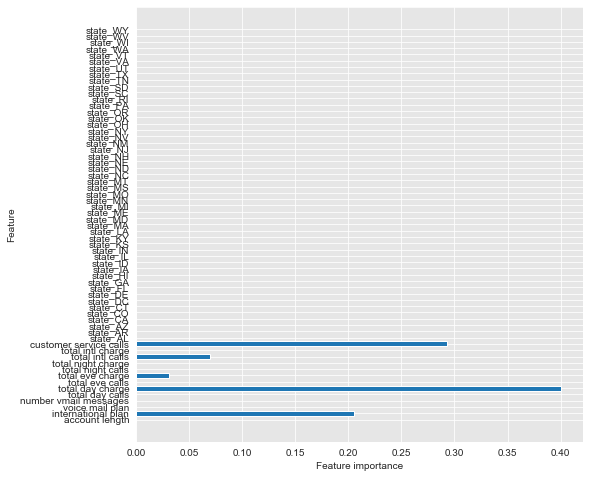

In [84]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(dt)

## Bagging

In [85]:
bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20, random_state=SEED)

In [86]:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20, random_state=1)

In [87]:
bagged_tree.score(X_train, y_train)

0.9624906226556639

In [88]:
bagged_tree.score(X_test, y_test)

0.9400299850074962

In [89]:
y_pred = bagged_tree.predict(X_test)

In [90]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[557   9]
 [ 31  70]]
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       566
         1.0       0.89      0.69      0.78       101

    accuracy                           0.94       667
   macro avg       0.92      0.84      0.87       667
weighted avg       0.94      0.94      0.94       667



In [91]:
#Changing to entropy
bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=5), n_estimators=20, random_state=SEED)

In [92]:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5),
                  n_estimators=20, random_state=1)

In [93]:
bagged_tree.score(X_train, y_train)

0.9662415603900976

In [94]:
bagged_tree.score(X_test, y_test)

0.9460269865067467

In [95]:
y_pred = bagged_tree.predict(X_test)

In [96]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[559   7]
 [ 29  72]]
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       566
         1.0       0.91      0.71      0.80       101

    accuracy                           0.95       667
   macro avg       0.93      0.85      0.88       667
weighted avg       0.94      0.95      0.94       667



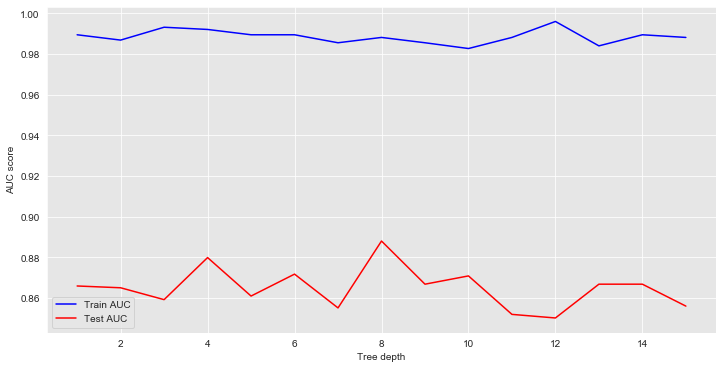

In [97]:
#Slight increase, can this be improved by adjusting max_depth?
max_depths = np.linspace(1, 15, 15, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', random_state=SEED), n_estimators=20)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

## Random Forest

In [98]:
forest = RandomForestClassifier(n_estimators=100, max_depth=5)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [99]:
forest.score(X_train, y_train)

0.8608402100525131

In [100]:
forest.score(X_test, y_test)

0.848575712143928

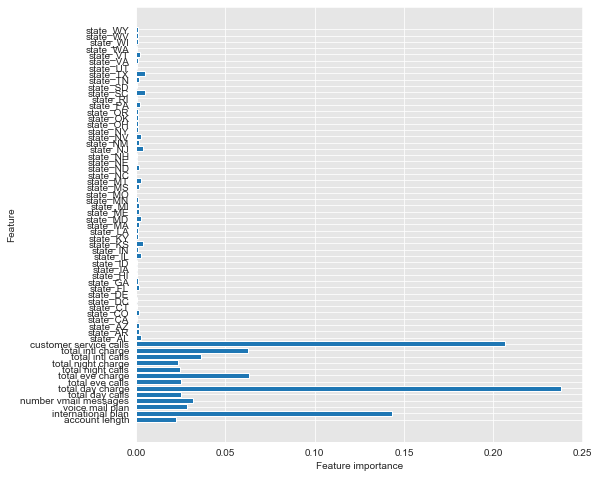

In [101]:
plot_feature_importances(forest)

In [102]:
y_pred = forest.predict(X_test)

In [103]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[566   0]
 [101   0]]
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       566
         1.0       0.00      0.00      0.00       101

    accuracy                           0.85       667
   macro avg       0.42      0.50      0.46       667
weighted avg       0.72      0.85      0.78       667



In [104]:
#Not good.  Let's try using SMOTE.
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)

In [105]:
rf1 = RandomForestClassifier()
rf1.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [106]:
y_preds_test = rf1.predict(X_test)
y_preds_train = rf1.predict(X_train_resampled)

print('Training Recall:', recall_score(y_train_resampled, y_preds_train))
print('Testing Recall:', recall_score(y_test, y_preds_test))

Training Recall: 1.0
Testing Recall: 0.7227722772277227


In [107]:
rf1.score(X_train_resampled, y_train_resampled)

1.0

In [108]:
rf1.score(X_test, y_test)

0.9295352323838081

In [109]:
y_pred = forest.predict(X_test)

In [110]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[566   0]
 [101   0]]
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       566
         1.0       0.00      0.00      0.00       101

    accuracy                           0.85       667
   macro avg       0.42      0.50      0.46       667
weighted avg       0.72      0.85      0.78       667



In [111]:
#Not too helpful, might check back with Pipeline

## Gradient Boosting and AdaBoost

In [112]:
adaboost_clf = AdaBoostClassifier(random_state=42)

In [113]:
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [114]:
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

In [115]:
print_metrics(y_train, adaboost_train_preds)

Precision Score: 0.6975806451612904
Recall Score: 0.45287958115183247
Accuracy Score: 0.8934733683420856
F1 Score: 0.5492063492063493


In [116]:
print_metrics(y_test, adaboost_test_preds)

Precision Score: 0.6538461538461539
Recall Score: 0.33663366336633666
Accuracy Score: 0.8725637181409296
F1 Score: 0.4444444444444445


In [117]:
gbt_clf = GradientBoostingClassifier(random_state=42)

In [118]:
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [119]:
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [120]:
print_metrics(y_train, gbt_clf_train_preds)

Precision Score: 0.9873417721518988
Recall Score: 0.8167539267015707
Accuracy Score: 0.9722430607651913
F1 Score: 0.8939828080229226


In [121]:
print_metrics(y_test, gbt_clf_test_preds)

Precision Score: 0.9012345679012346
Recall Score: 0.7227722772277227
Accuracy Score: 0.9460269865067467
F1 Score: 0.8021978021978022
